## Import libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline

## Generate data

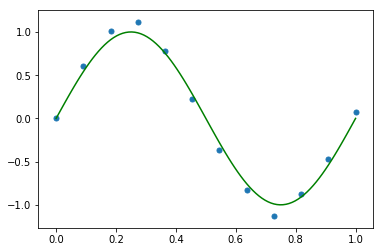

In [64]:
x = np.linspace(0.0,1.0,num=100) # generate 100 points
y = np.sin(2*np.pi*x)
xsample = np.linspace(0.0,1.0,num=12)
ysample = np.sin(2*np.pi*xsample) + np.random.randn(12)*0.1 # add noise
plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,s=25,marker='o')

## Degree 1 linear regression model (in red)

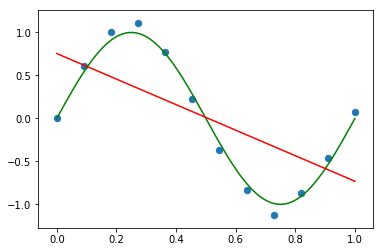

In [65]:
# fit a linear function on xsample, ysample
lr1 = linear_model.LinearRegression()
lr1.fit(xsample.reshape(-1,1),ysample)
ypred = lr1.predict(xsample.reshape(-1,1))
plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred,'r')

## Linear model with 5 degree (in red)

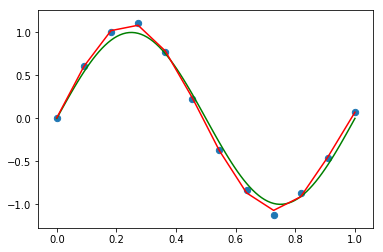

In [66]:
# fit a fifth degree polynomial
poly = PolynomialFeatures(5)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr5 = linear_model.LinearRegression()
lr5.fit(xpoly_sample,ysample)
ypred5 = lr5.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred5,'r')

## Linear model with 10 degree (in red)

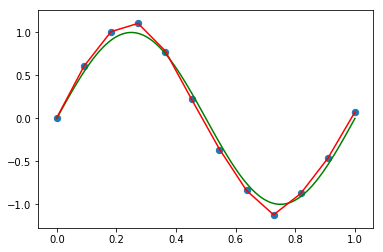

In [67]:
# fit a tenth degree polynomial
poly = PolynomialFeatures(10)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr10 = linear_model.LinearRegression()
lr10.fit(xpoly_sample,ysample)
ypred10 = lr10.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred10,'r')

## Linear model with 15 degree (in red)

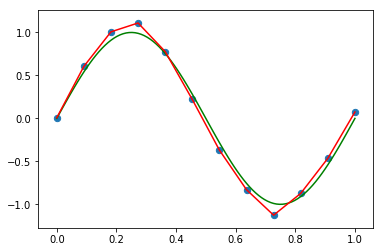

In [68]:
# fit a fifteenths degree polynomial
poly = PolynomialFeatures(15)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr15 = linear_model.LinearRegression()
lr15.fit(xpoly_sample,ysample)
ypred15 = lr15.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred15,'r')

## Measuring train and test error as a function of model degree

Text(0, 0.5, 'Sum Squared Error')

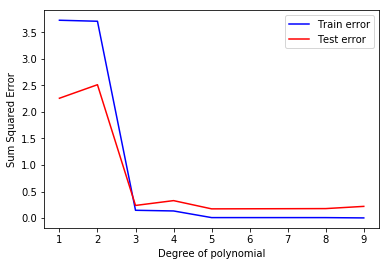

In [69]:
# train/test errors as a function of model complexity
train_error = np.zeros((15,))
test_error = np.zeros((15,))

# make an independent test set
xtest = np.linspace(0.0,1.0,num=30)[:10]
ytest = np.sin(2*np.pi*xtest) + np.random.randn(10)*0.1
 
for d in range(1,10):
    poly = PolynomialFeatures(d)
    xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
    lr = linear_model.LinearRegression()
    lr.fit(xpoly_sample,ysample)
    ypred_train = lr.predict(xpoly_sample)
    ypred_test = lr.predict(poly.fit_transform(xtest.reshape(-1,1)))
    tr_err = ysample-ypred_train
    train_error[d] = np.dot(tr_err.T,tr_err)
    te_err = ytest-ypred_test
    test_error[d] = np.dot(te_err.T,te_err)

    
plt.plot(range(1,10),train_error[1:10],'b',label='Train error')
plt.plot(range(1,10),test_error[1:10],'r',label='Test error')
plt.legend(loc='upper right')
plt.xlabel('Degree of polynomial') 
plt.ylabel('Sum Squared Error')